# Group 16


- Ana Margarida Valente, 20240936
- Catarina Carneiro, 20240690
- Rui Reis, 20240854
- Mara Mesquita, 20241039

Add indice

Add descriprion of the project

# 1. Import

## 1.1 Import Libraries

In [ ]:
import sqlite3
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from scipy.stats import skewnorm

from datetime import datetime
from sklearn.impute import KNNImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# Display all the df
pd.options.display.max_columns = None


## 1.2 Import Data

In [106]:
# Read the CSV file
df = pd.read_csv(r"C:\Users\anama\OneDrive\Ambiente de Trabalho\Mestrado\Projects\DM2425_ABCDEats_DATASET.csv")

In [107]:
#Create a backup of the df
df_backup=df

## Variables:
- customer_id: Unique identifier for each customer.
- customer_region: Geographic region where the customer is located.
- customer_age: Age of the customer.
- vendor_count: Number of unique vendors the customer has ordered from.
- product_count: Total number of products the customer has ordered.
- is_chain: Indicates whether the customer’s order was from a chain restaurant.
- first_order: Number of days from the start of the dataset when the customer first placed an order.
- last_order: Number of days from the start of the dataset when the customer most recently placed an order.
- last_promo: The category of the promotion or discount most recently used by the customer.
- payment_method: Method most recently used by the customer to pay for their orders.
- CUI_American,CUI_Asian,CUI_Chinese,CUI_Italian, etc.: The amount in monetary units spent by the customer from the indicated type of cuisine.
- DOW_0 to DOW_6: Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- HR_0 to HR_23: Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).


# 2. Explore the Data

In [108]:
df.shape

(31888, 56)

In [109]:
# Display the first few rows of the dataframe
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
#Check columns
df.columns.values

array(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order',
       'last_promo', 'payment_method', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'], dtype=object)

## Minor changes to the Data
1) Change the DOW columns to the days of the week names

2) Create new variables
  - Time Periods
  - Age Group



In [111]:
#1)
df= df.rename(columns={'DOW_0':'Sunday', 'DOW_1':'Monday', 'DOW_2':'Tuesday', 'DOW_3':'Wednesday', 'DOW_4':'Thursday', 'DOW_5':'Friday','DOW_6':'Saturday'})

In [112]:
#2
df['early_morning(0h-5h)'] = df.filter(regex=r'^HR_[0-5]$').sum(axis=1).astype(int)

df['morning(6h-11h)'] = df.filter(regex=r'^HR_([6-9]|1[0-1])$').sum(axis=1).astype(int)

df['afternoon(12h-17h)']= df.filter(regex=r'^HR_1[2-7]$').sum(axis=1).astype(int)

df['night(18h-23h)'] = df.filter(regex=r'^HR_(1[8-9]|2[0-3])$').sum(axis=1).astype(int)


In [113]:
#2
age_labels = ['Teenagers (15-19)', 'Young Adults (20-29)', 'Adults (30-49)', 'Middle-aged (50-64)', 'Seniors (65-80)']
df['age_group'] = pd.cut(df['customer_age'], bins=[15, 20, 30, 50, 65, 80], labels=age_labels, right=False)

## Data Analysis

### Data types:
- customer_age -> float? (change to int)
- first_order -> float? (change to int or date time (days) ?)
- last_order (change to date time (days) ?)
- HR_0 -> float? (change to int)

In [114]:
#Create a df only with the original variables (Drop the new columns created)
df_original = df.drop(columns=['early_morning(0h-5h)','morning(6h-11h)','afternoon(12h-17h)','night(18h-23h)','age_group'])

In [115]:
# Check data types
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

### 
Fix data types:

In [116]:
df['customer_age'] = df['customer_age'].astype('Int64')
df['first_order'] = df['first_order'].astype('Int64')
df['HR_0'] = df['HR_0'].astype('Int64')

In [117]:
#Check only the original df = Categorical Variables
df_original.describe(include="O").T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


In [118]:
#Check only the original df = Numerical Variables
df_original.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


## Check for missing values:

In [119]:
df.isna().any()

customer_id             False
customer_region         False
customer_age             True
vendor_count            False
product_count           False
                        ...  
early_morning(0h-5h)    False
morning(6h-11h)         False
afternoon(12h-17h)      False
night(18h-23h)          False
age_group                True
Length: 61, dtype: bool

In [120]:
df.isna().sum()

customer_id               0
customer_region           0
customer_age            727
vendor_count              0
product_count             0
                       ... 
early_morning(0h-5h)      0
morning(6h-11h)           0
afternoon(12h-17h)        0
night(18h-23h)            0
age_group               730
Length: 61, dtype: int64

In [121]:
#Check the % of the missing values:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)

print("Percentage of Missing Values:")
print(missing_percentage)

Percentage of Missing Values:
HR_0            3.653412
age_group       2.289262
customer_age    2.279854
first_order     0.332413
HR_8            0.000000
                  ...   
Monday          0.000000
Tuesday         0.000000
Wednesday       0.000000
Thursday        0.000000
Friday          0.000000
Length: 61, dtype: float64



Missing Values : HR_0

In [122]:
#Check when HR_0 = NaN, which is the variable with most missing values
nan_HR_0 = df[df['HR_0'].isna()]
pd.set_option('display.max_columns', None)
nan_HR_0

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
34,ae38da6386,8670,21,2,3,1,0,7,DELIVERY,DIGI,0.00,23.70,0.0,0.0,0.0,12.08,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,0,2,<NA>,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
87,a21a839c77,4140,19,1,4,4,0,21,-,CARD,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,22.09,0.0,0,0,0,0,0,0,4,<NA>,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,2,Teenagers (15-19)
121,9237d23413,8670,22,3,4,2,0,27,-,CARD,5.77,17.76,5.9,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0,1,0,0,0,1,2,<NA>,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,Young Adults (20-29)
132,8c6ffd7357,4660,25,3,4,1,0,28,-,CARD,27.54,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,6.10,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,0,3,<NA>,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,Young Adults (20-29)
186,67c6c9f9c4,4660,24,1,3,0,0,36,FREEBIE,DIGI,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,6.14,0.0,0.0,0.0,0.00,0.0,1,0,1,0,0,0,1,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,Young Adults (20-29)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31298,37b72b449d,2360,23,1,4,0,85,85,DELIVERY,DIGI,0.00,24.08,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,1,0,0,0,0,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Young Adults (20-29)
31549,ac382ddfd1,-,28,1,2,2,87,89,DELIVERY,CARD,0.00,17.87,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0,0,1,0,1,0,0,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,Young Adults (20-29)
31615,96f1fc25e3,8670,25,2,2,1,88,88,DELIVERY,CASH,0.00,17.98,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,2,0,0,0,<NA>,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
31781,d7c7face7e,2440,26,1,1,1,90,90,DELIVERY,CASH,2.61,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,1,0,<NA>,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Young Adults (20-29)


In [123]:
#Define the columns of the DOW and the HR columns
dow_columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hr_columns = [col for col in df.columns if col.startswith('HR_')]

In [124]:
#To replace the NaN's of HR_0, let's compare the sum of orders of the DOW with the sum of orders of the HR:
#If it's the same, then HR_0 should be 0, if not, it's the difference between the 2 values, since the sum should be equal

row_sum_dow = df[dow_columns].sum(axis=1)
row_sum_hr = df[hr_columns].sum(axis=1)

row_difference = row_sum_dow - row_sum_hr

df.loc[df['HR_0'].isna(), 'HR_0'] = row_difference

df['HR_0'].head()


0    0
1    0
2    0
3    0
4    0
Name: HR_0, dtype: Int64

In [125]:
df['HR_0'].isna().sum()

0

In [126]:
#Check if the sum of the DOW is equal to the sum of the Hours; It must be
check = (df[dow_columns].sum(axis=1) == df[hr_columns].sum(axis=1)).all()

if check:
    print("Yes")
else:
    print("No")

Yes



Missing Values : first_order

In [127]:
#Check when first_order = NaN
nan_first_order = df[df['first_order'].isna()]
nan_first_order

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
31782,0366fbb035,8670,24,1,1,0,<NA>,0,-,DIGI,0.00,11.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
31783,039d7c8a20,4660,23,1,1,0,<NA>,0,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,14.49,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Young Adults (20-29)
31784,04c9d25c93,8670,27,1,1,1,<NA>,0,DISCOUNT,CASH,18.16,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
31785,09118ae9e7,8670,36,1,1,0,<NA>,0,-,CARD,0.00,6.02,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Adults (30-49)
31786,0d1f298bbd,4660,22,1,1,1,<NA>,0,DISCOUNT,CASH,5.22,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,Young Adults (20-29)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30,1,1,1,<NA>,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Adults (30-49)
31884,f6b6709018,8670,<NA>,1,1,0,<NA>,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,NaN
31885,f74ad8ce3f,8670,24,1,1,1,<NA>,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Young Adults (20-29)
31886,f7b19c0241,8670,34,1,1,0,<NA>,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Adults (30-49)


It seem that when the first_order is a missing value, the last_order = 0.

In [128]:
df[df['first_order'].isna() & (df_original['last_order'] == 0)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
31782,0366fbb035,8670,24,1,1,0,<NA>,0,-,DIGI,0.00,11.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
31783,039d7c8a20,4660,23,1,1,0,<NA>,0,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,14.49,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Young Adults (20-29)
31784,04c9d25c93,8670,27,1,1,1,<NA>,0,DISCOUNT,CASH,18.16,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
31785,09118ae9e7,8670,36,1,1,0,<NA>,0,-,CARD,0.00,6.02,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Adults (30-49)
31786,0d1f298bbd,4660,22,1,1,1,<NA>,0,DISCOUNT,CASH,5.22,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,Young Adults (20-29)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30,1,1,1,<NA>,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Adults (30-49)
31884,f6b6709018,8670,<NA>,1,1,0,<NA>,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,NaN
31885,f74ad8ce3f,8670,24,1,1,1,<NA>,0,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Young Adults (20-29)
31886,f7b19c0241,8670,34,1,1,0,<NA>,0,DISCOUNT,DIGI,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Adults (30-49)


In [129]:
#First we are checking to see if in this situation, there was only one order placed
check = (df[df['first_order'].isna() & (df['last_order'] == 0)][dow_columns].sum(axis=1) == 1).all()

if check:
    print("All rows have row_sum_dow equal to 1 (indicating only one order).")
else:
    print("There are rows where row_sum_dow is not 1.")

There are rows where row_sum_dow is not 1.


In [130]:
#Check which rows do not meet the condition
non_matching_rows = df[(df['first_order'].isna() & (df['last_order'] == 0)) & (df[dow_columns].sum(axis=1) != 1)]

non_matching_rows

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
31796,1f9cd0d268,2360,30,2,2,2,<NA>,0,-,CARD,0.0,0.0,0.0,0.0,0.0,0.0,4.08,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,Adults (30-49)
31855,c3690a6fa1,8670,27,2,7,1,<NA>,0,DISCOUNT,CARD,0.0,0.0,0.0,0.0,0.0,0.0,25.69,0.0,0.0,0.0,0.0,0.0,0.0,79.86,0.0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,Young Adults (20-29)


There are only 2 cases that do not meet the condition. Both cases show that 2 orders were placed on the same day (Saturday). 

Based on this previous analysis, we will assume that when first_order is missing it should be replaced with 0, ensuring that both first_order and last_order occur on the same day (the day the dataset begins).

In [131]:
#first_order is missing only when last_order = 0
#first_order cannot happen after last_order. So we will set the missing first_order values to 0
df.loc[df['first_order'].isna() & (df['last_order'] == 0), 'first_order'] = 0


Missing Values : customer_age

In [132]:
#Check when customer_age = NaN
nan_customer_age = df[df['customer_age'].isna()]
nan_customer_age

#Maybe replace the missing values with the mean or median

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
3,180c632ed8,4660,<NA>,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN
27,8e8652bdc8,4660,<NA>,2,3,2,0,6,DISCOUNT,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,34.88,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,NaN
37,6137fa5620,8670,<NA>,2,2,2,0,8,DISCOUNT,CARD,6.13,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,13.15,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN
69,2a90e9da84,4660,<NA>,2,2,1,0,17,-,CARD,15.99,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,1.54,0.0,0.0,0.00,0.00,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,NaN
73,a67d3108cb,8670,<NA>,2,2,1,0,17,-,CARD,0.00,25.85,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31488,46aa9dfeb0,8670,<NA>,1,2,0,87,87,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,25.05,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
31572,29207a92c8,2360,<NA>,1,1,1,88,88,-,CASH,0.00,0.00,3.88,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
31762,d7bf721199,2360,<NA>,1,1,1,89,89,-,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,3.74,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
31877,ee49f4eb0a,2440,<NA>,1,1,1,0,0,DELIVERY,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,3.16,0.00,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,NaN


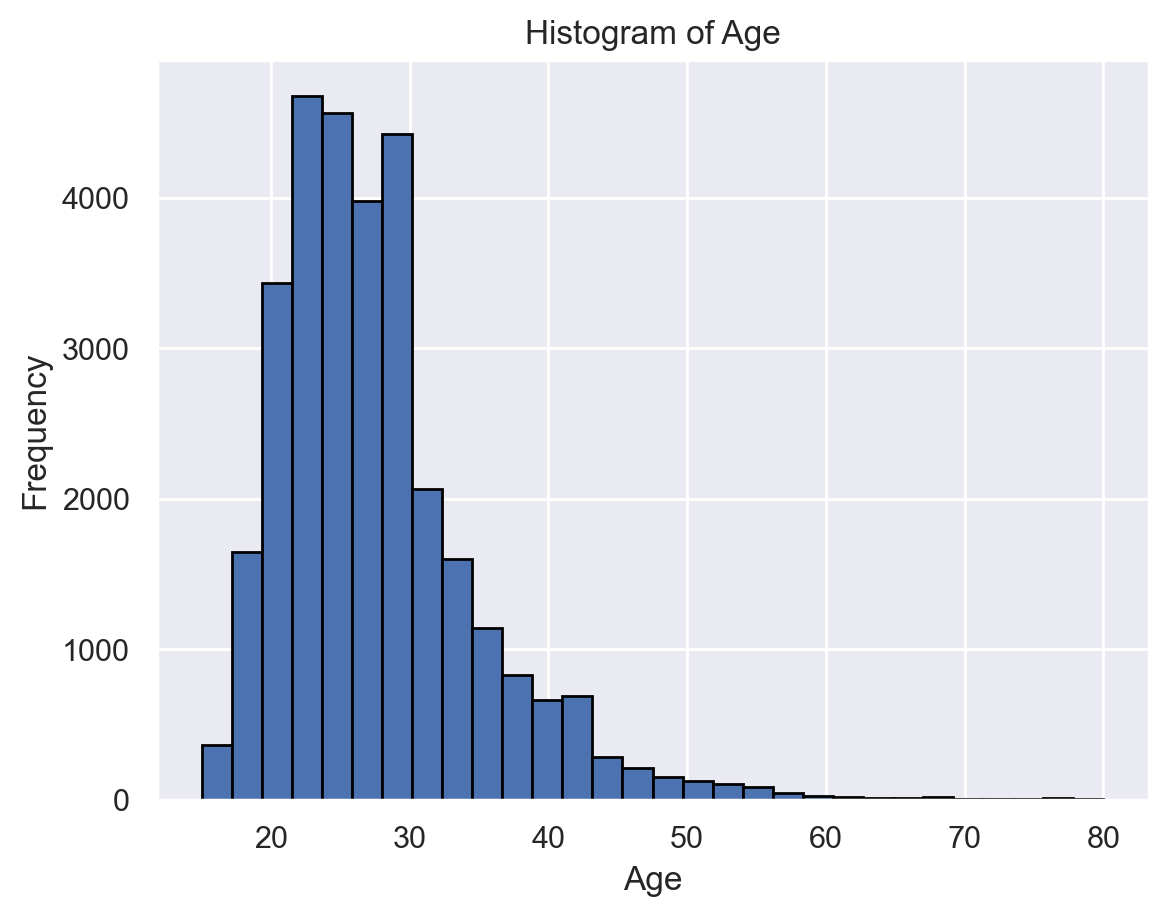

In [133]:
plt.hist(df['customer_age'].dropna(), bins=30, edgecolor='black')  
plt.title('Histogram of Age')
plt.xlabel('Age') 
plt.ylabel('Frequency') 
plt.show()

In [134]:
#Since the histogram is skewed, the median is preferred to replace the missing values
median_age = df['customer_age'].median()
df['customer_age'] = df['customer_age'].fillna(median_age)


## Check for Duplicates

In [135]:
df.duplicated().sum()

13

In [136]:
df.loc[df_original.duplicated(keep=False)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
3355,b55012ee1c,8550,23,4,11,1,2,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,Young Adults (20-29)
3379,b55012ee1c,8550,23,4,11,1,2,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,Young Adults (20-29)
7867,24251eb7da,8550,28,4,8,3,7,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,2,0,Young Adults (20-29)
7887,24251eb7da,8550,28,4,8,3,7,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,2,0,Young Adults (20-29)
16227,671bf0c738,8550,25,4,7,3,23,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2,1,Young Adults (20-29)
16230,671bf0c738,8550,25,4,7,3,23,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2,1,Young Adults (20-29)
20855,742ca068fc,8550,20,1,2,0,35,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
20907,742ca068fc,8550,20,1,2,0,35,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
24328,df91183978,8550,23,2,3,1,47,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,Young Adults (20-29)
24329,df91183978,8550,23,2,3,1,47,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,Young Adults (20-29)


In [137]:
#% of duplicates:
df.duplicated().mean()*100

0.040767686904164574

In [142]:
#Identify customer_id duplicated (since it should be a unique value, representing 1 customer)
duplicate_values = df['customer_id'].value_counts()[df['customer_id'].value_counts() > 1]

duplicate_rows = df[df['customer_id'].isin(duplicate_values.index)]

print("\n")
print(f'Total: {len(duplicate_rows)}') #drop it?
duplicate_rows



Total: 26


,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
3355,b55012ee1c,8550,23,4,11,1,2,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,Young Adults (20-29)
3379,b55012ee1c,8550,23,4,11,1,2,89,FREEBIE,CARD,0.00,93.43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,3,2,3,1,1,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,Young Adults (20-29)
7867,24251eb7da,8550,28,4,8,3,7,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,2,0,Young Adults (20-29)
7887,24251eb7da,8550,28,4,8,3,7,85,-,CARD,30.44,18.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,32.27,0.0,1,0,3,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,2,0,Young Adults (20-29)
16227,671bf0c738,8550,25,4,7,3,23,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2,1,Young Adults (20-29)
16230,671bf0c738,8550,25,4,7,3,23,66,FREEBIE,CARD,56.18,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.53,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,2,1,Young Adults (20-29)
20855,742ca068fc,8550,20,1,2,0,35,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
20907,742ca068fc,8550,20,1,2,0,35,35,-,CARD,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,31.57,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Young Adults (20-29)
24328,df91183978,8550,23,2,3,1,47,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,Young Adults (20-29)
24329,df91183978,8550,23,2,3,1,47,52,DELIVERY,CARD,0.00,18.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,17.34,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,Young Adults (20-29)


The duplicates are only the cases where the customer_id is duplicated, meaning that are 2 entries of the same customer in the dataset

In [143]:
#Drop the duplicates, since it's a very small amount????
df.drop_duplicates(inplace=True)

## Check for unique and strange values:

Vendor_count

In [160]:
df['vendor_count'].unique()

array([ 2,  1,  3,  4,  5,  7,  6, 11,  9,  8, 12, 14, 20, 13, 10, 16, 24,
       18, 17, 15, 25, 30, 19, 21, 23, 22, 28, 32, 41, 40, 26,  0, 27, 34,
       31, 35, 29], dtype=int64)

In [161]:
df[df['vendor_count'] == 41]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
1263,89b7866691,2360,20,41,110,73,0,88,DELIVERY,DIGI,33.25,0.0,46.6,4.74,12.06,6.08,10.19,13.97,0.0,1.25,15.35,5.55,202.54,1.3,9.89,6,15,15,11,8,13,14,0,1,0,1,1,0,0,0,1,3,4,0,0,1,5,16,22,8,6,4,4,1,1,3,3,8,52,19,Young Adults (20-29)


Product_count

In [162]:
df['product_count'].unique()

array([  5,   2,   3,   4,   6,  10,   8,  17,   7,  26,   9,  32,  15,
        13,  16,  28,  19,  12,  18,  11,  25,  14,  23,  29,  21,  31,
        95,  24,  64,  27,  37,  49,  22,  41,  51,  34,  39,  20,  30,
        47,  40,  53,  38,  54,  35,  33,  56,  65,  45,  63,  36,  79,
        48,  70,  44,  84,  46,  66,  57,  58,  83, 110, 117, 269,  75,
        55,  42,  81,  91,  43,  69,  67,  72,  59,   1,   0,  77,  97,
        87,  73,  76,  60, 109,  52,  62,  94,  80,  89,  61,  82,  50,
        88,  68], dtype=int64)

In [163]:
df[df['product_count'] == 269]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
1270,92ced2dcb9,2360,23,40,269,81,0,88,N0 PROMO,CARD,19.08,70.01,37.92,18.3,0.0,739.73,0.0,0.0,0.0,20.11,84.05,197.84,109.31,12.34,109.64,15,17,14,10,9,9,20,0,0,0,0,0,0,0,0,0,1,3,9,12,3,4,3,8,14,7,15,9,2,2,2,0,13,44,37,Young Adults (20-29)


Region

In [144]:
df['customer_region'].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      13
Name: count, dtype: int64

In [145]:
(len(df[df['customer_region'] == '-']) / len(df))*100

1.3866666666666667

In [166]:
# Replace '-' with the mode
mode_value = df['customer_region'].mode()[0]  

df['customer_region'] = df['customer_region'].replace('-', mode_value)


- '-' -> Strange = 1,386%; Maybe use mode or drop?
- There are 3 cities, so should we aggregate the cities by the first number of the region? (2,4,8)
- Another possibilitie is to aggregate the cities based on the frequency of customers. (1 (>5000) - 8670, 4660, 2360; 2 (<5000 & >1000) - 2440, 4140; 3 (<1000) - 8370, 2490, -, 8550 )
- (issue to think about and address in the future, 1 option keeps the distribution balanced and the other does not)

 Age

In [146]:
df['customer_age'].unique()

<IntegerArray>
[18, 17, 38, 26, 20, 40, 24, 27, 33, 21, 51, 35, 22, 31, 15, 47, 19, 28, 32,
 25, 37, 42, 48, 16, 34, 29, 23, 30, 39, 46, 41, 49, 53, 36, 43, 44, 45, 57,
 58, 68, 56, 61, 60, 54, 59, 50, 55, 52, 65, 75, 66, 79, 80, 63, 77, 62, 69,
 72, 64, 76, 74, 67, 70, 78, 71, 73]
Length: 66, dtype: Int64

In [147]:
df[(df['customer_age'] == 15) | (df['customer_age'] == 16)| (df['customer_age'] == 17)]
#It could be a problem since it's a minor

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,Teenagers (15-19)
20,e79f867434,8670,15,2,3,1,0,5,DELIVERY,DIGI,6.06,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,23.92,0.00,0.0,0.00,0.00,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,Teenagers (15-19)
55,63cb294ad9,8670,16,5,8,1,0,13,-,CARD,0.00,56.16,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,24.56,0.00,2,2,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,Teenagers (15-19)
65,6f36cc3a8c,2360,17,2,4,2,0,16,-,CASH,0.00,0.00,0.00,0.0,6.88,0.0,0.0,0.0,0.00,0.0,0.00,12.40,0.0,0.00,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,Teenagers (15-19)
154,a4d5c3fd0f,2360,17,4,6,4,0,31,-,DIGI,0.00,0.00,9.06,0.0,0.00,0.0,0.0,0.0,0.00,0.0,19.15,4.09,0.0,0.00,0.00,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,1,3,Teenagers (15-19)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,fcdb9ad549,4660,17,1,2,0,86,86,DELIVERY,CARD,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,18.87,0.00,0.0,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,Teenagers (15-19)
31511,adf17e4ce1,4140,17,1,1,1,87,87,-,CARD,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,7.50,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,Teenagers (15-19)
31654,13bf3a1137,4140,17,1,3,0,88,89,-,CASH,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,17.13,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,Teenagers (15-19)
31662,0349679dc2,-,17,1,2,0,89,89,FREEBIE,DIGI,0.00,23.86,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,Teenagers (15-19)


Promotion

In [148]:
df['last_promo'].value_counts()

last_promo
-           16744
DELIVERY     6282
DISCOUNT     4496
FREEBIE      4353
Name: count, dtype: int64

- '-' -> Changing to 'NO PROMO', to be more perceptible

In [149]:
df['last_promo'] = df['last_promo'].replace('-', 'N0 PROMO')

Payment Method

In [150]:
df['payment_method'].value_counts()

payment_method
CARD    20153
DIGI     6098
CASH     5624
Name: count, dtype: int64

First Order

In [151]:
df['first_order'].unique()

<IntegerArray>
[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
Length: 91, dtype: Int64

In [152]:
df['first_order'].max()
#Makes sense because the dataset is from a three-month period

90

Last Order

In [153]:
df['last_order'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90,  9, 15,  0], dtype=int64)

In [154]:
df['first_order'].max()

90

Is Chain

- This variable needs to be fixed. The metadata does not correspond to the dataset

- Make it binary (correspondant to the metadata); Change the info on the metadata to be coherent to the dataset

In [155]:
df['is_chain'].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

In [164]:
# Most of the orders are on bevarages
df[df['is_chain'] == 83]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
2435,d798652ec0,2360,28,27,109,83,1,89,N0 PROMO,CARD,2.57,28.41,229.22,2.86,0.0,2.84,10.34,58.29,10.43,2.27,0.0,0.0,79.47,7.44,0.0,16,17,10,17,15,8,8,0,0,0,0,0,0,0,2,2,2,8,13,17,12,6,7,3,3,6,8,2,0,0,0,0,27,48,16,Young Adults (20-29)


DOW 

In [156]:
for column in dow_columns:
    unique_values = df[column].unique()  # Get unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-" * 70)

Column: Monday
Unique Values: [ 0  1  2  3  6  4  9  5 10  8  7 11 13 15 17 16 12]
----------------------------------------------------------------------
Column: Tuesday
Unique Values: [ 0  1  2  3  4  9  5  7  6  8 15 14 10 11 12 13]
----------------------------------------------------------------------
Column: Wednesday
Unique Values: [ 0  1  2  3  4  8  5  6  7  9 10 14 11 17 13 12 16]
----------------------------------------------------------------------
Column: Thursday
Unique Values: [ 0  1  2  3  6 10  4  7  5  8  9 11 14 12 13 15 16]
----------------------------------------------------------------------
Column: Friday
Unique Values: [ 0  1  2  3  5  4 10  7  9  6  8 13 11 15 12 20 14]
----------------------------------------------------------------------
Column: Saturday
Unique Values: [ 1  2  3  4  7  9  6  5  8 10 11 17 13 12 14 20  0]
----------------------------------------------------------------------
Column: Sunday
Unique Values: [ 1  0  2  3  5  4  9  6  8 10  7 11 15 1

Hours

In [157]:
for column in hr_columns:
    unique_values = df[column].unique()  # Get unique values
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-" * 70)

Column: HR_0
Unique Values: <IntegerArray>
[0, 1, 2, 3, 5, 4, 12, 9, 8, 7, 6, 11, 15]
Length: 13, dtype: Int64
----------------------------------------------------------------------
Column: HR_1
Unique Values: [ 0  1  2  4  3  5  9  6  8 14  7]
----------------------------------------------------------------------
Column: HR_2
Unique Values: [ 0  1  2  5  7  3 12  6  8 10  9  4]
----------------------------------------------------------------------
Column: HR_3
Unique Values: [ 0  1  2  5  7  3  4  6  8 10 11  9]
----------------------------------------------------------------------
Column: HR_4
Unique Values: [ 0  1  2 13  5 10  3  7  4 14  8  6  9]
----------------------------------------------------------------------
Column: HR_5
Unique Values: [0 1 2 4 3 7 5]
----------------------------------------------------------------------
Column: HR_6
Unique Values: [0 1 2 4 3 7 8 5 6]
----------------------------------------------------------------------
Column: HR_7
Unique Values: [ 0  1  

In [165]:
df[df['HR_8'] == 52]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,early_morning(0h-5h),morning(6h-11h),afternoon(12h-17h),night(18h-23h),age_group
3368,e1491fb8f7,2360,17,2,75,75,2,89,FREEBIE,CARD,0.0,0.0,173.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.18,11,11,14,9,10,10,10,0,0,0,0,0,0,1,13,52,4,2,0,0,0,0,0,0,2,1,0,0,0,0,0,0,72,2,1,Teenagers (15-19)


Cuisine Types

In [158]:
for col in df.columns:
    if col.startswith('CUI_'):
        unique_values = df[col].unique()  
        print(f"Column: {col}")
        print(f"Unique Values: {unique_values}")
        print("-" * 70)

Column: CUI_American
Unique Values: [ 0.   12.82  9.2  ... 14.45 23.12  8.65]
----------------------------------------------------------------------
Column: CUI_Asian
Unique Values: [ 0.    6.39 13.7  ... 22.71 17.23  2.21]
----------------------------------------------------------------------
Column: CUI_Beverages
Unique Values: [ 0.    1.53 24.4  ... 62.8  23.44 32.57]
----------------------------------------------------------------------
Column: CUI_Cafe
Unique Values: [ 0.    5.07  2.6  ... 10.9   2.73 13.06]
----------------------------------------------------------------------
Column: CUI_Chicken Dishes
Unique Values: [ 0.    6.21  5.59 ...  4.92 11.53 10.76]
----------------------------------------------------------------------
Column: CUI_Chinese
Unique Values: [ 0.   11.31 31.05 ...  0.68 38.27 24.74]
----------------------------------------------------------------------
Column: CUI_Desserts
Unique Values: [ 0.    9.72  5.82 ...  4.08 25.69 17.79]
-----------------------------

# 3. Feature Understanding

Define groups of columns and create a new feature = Sum_of_Orders

In [ ]:
#Define groups of columns of the same category
dow_columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hr_columns = [col for col in df.columns if col.startswith('HR_')]
CUI_columns = [col for col in df.columns if col.startswith('CUI_')]
time_columns = ['early_morning(0h-5h)','morning(6h-11h)','afternoon(12h-17h)', 'night(18h-23h)']

#Define the sum of the columns
DOW_counts = df[dow_columns].sum()
HR_counts = df[hr_columns].sum()
CUI_counts = df[CUI_columns].sum()
time_counts = df[time_columns].sum()

#Define a new Feature that contains the sum of orders by customer (it has the same info as DOW_counts and HR_counts)
df['Sum_of_Orders'] = df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].sum(axis=1)


Aggregate the regions of customers by city ?

Option 1 - Based on the first digit

In [ ]:
# Creating new variable customer_city_1 dividied into categories 
def categorize_city_1(customer_region):
    if pd.isna(customer_region):  # Check if the value is NaN
        return np.nan 
    elif customer_region== "-":
        return "Other"
    elif customer_region[0].isdigit():
        return customer_region[0]
    else:
        return "Other"


# Apply the function to create the new 'customer_city' column
df['customer_city_1'] = df['customer_region'].apply(categorize_city_1)

print(df['customer_city_1'].value_counts(dropna=False))

Option 2 - Based on the count distribution

In [ ]:
df['customer_region'].value_counts()

In [ ]:
# Creating new variable customer_city_2 dividied into categories 
def categorize_city_2(customer_region):
    if pd.isna(customer_region):  # Check if the value is NaN
        return np.nan
    elif customer_region== "-":
        return "Other" 
    elif customer_region in ["8670", "4660", "2360"]:
        return "City 1"
    elif customer_region in ["2440", "4140"]:
        return "City 2"
    else:
        return "City 3"


# Apply the function to create the new 'customer_city' column
df['customer_city_2'] = df['customer_region'].apply(categorize_city_2)

print(df['customer_city_2'].value_counts(dropna=False))

Check comparation between First Order and Last Order

In [ ]:
result = df[df['last_order'] < df['first_order']]
print(result)
#All good, since it wouldn't make sense if there was a last order before a first order

 Define Numerical and Categorical Features

In [ ]:
numerical_features=['customer_age', 'vendor_count','product_count', 'is_chain', 'first_order', 'last_order']
categorical_features=['customer_region','last_promo','payment_method','age_group']

## Numerical Features

In [ ]:
def analyze_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    outliers = data[(data < lower_lim) | (data > upper_lim)]
    percentage = (len(outliers) / len(data)) * 100  
    return len(outliers), percentage, lower_lim, upper_lim

In [ ]:
for col in numerical_features:
    print(f" Statistics for column: {col}")
    
    # Calculate key statistics
    mean = df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    skewness = df[col].skew()
    kurtosis = df[col].kurt()

    # Display the statistics
    print(f'  Mean: {mean:.2f}')
    print(f'  Median: {median:.2f}')
    print(f'  Standard Deviation: {std_dev:.2f}')
    print(f'  Min: {min_val}')
    print(f'  Max: {max_val}')
    print(f'  Skewness: {skewness:.2f}')
    print(f'  Kurtosis: {kurtosis:.2f}')
    print('-' * 50 )
    
    # Visualization of each Variable:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    # Analyze outliers for the numerical variables
    outlier_count, outlier_percentage, lower_lim, upper_lim = analyze_outliers(df[col])
  
    print(f'Count of outliers: {outlier_count}')
    print(f'Percentage of outliers: {outlier_percentage:.2f}%')
    print(f'Lower Lim:{lower_lim}')
    print(f'Upper Lim:{upper_lim}')
    print('-' * 40)
   
    plt.tight_layout()
    plt.show()

In [ ]:
hr_dow_cui=['CUI_American', 'CUI_Asian', 'CUI_Beverages','CUI_Cafe', 'CUI_Chicken Dishes', 
            'CUI_Chinese', 'CUI_Desserts','CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
            'CUI_Japanese','CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks','CUI_Thai', 
            'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 
            'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5','HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 
            'HR_11', 'HR_12', 'HR_13','HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21','HR_22', 'HR_23']

for col in hr_dow_cui:
    print(f" Statistics for column: {col}")
    
    # Calculate key statistics
    mean = df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    skewness = df[col].skew()
    kurtosis = df[col].kurt()

    # Display the statistics
    print(f'  Mean: {mean:.2f}')
    print(f'  Median: {median:.2f}')
    print(f'  Standard Deviation: {std_dev:.2f}')
    print(f'  Min: {min_val}')
    print(f'  Max: {max_val}')
    print(f'  Skewness: {skewness:.2f}')
    print(f'  Kurtosis: {kurtosis:.2f}')
    print('-' * 50 )
    
    # Visualization of each Variable:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    # Analyze outliers for the numerical variables
    outlier_count, outlier_percentage, lower_lim, upper_lim = analyze_outliers(df[col])
  
    print(f'Count of outliers: {outlier_count}')
    print(f'Percentage of outliers: {outlier_percentage:.2f}%')
    print(f'Lower Lim:{lower_lim}')
    print(f'Upper Lim:{upper_lim}')
    print('-' * 40)
   
    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
DOW_counts.plot(kind='bar', 
                color='lightsteelblue', 
                edgecolor='black')

plt.title('Number of Orders for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
HR_counts.plot(kind='bar', 
               color='lightsteelblue', 
               edgecolor='black')

plt.title('Number of Orders for Each Hour')
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
time_counts.plot(kind='bar', 
                 color='lightsteelblue', 
                 edgecolor='black')

plt.title('Number of Orders for Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Ordes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
CUI_counts_sorted = CUI_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
CUI_counts_sorted.plot(kind='bar', 
                       color='lightsteelblue', 
                       edgecolor='black')

plt.title('Expenses for each Type of Cuisine')
plt.xlabel('Type of Cuisine')
plt.ylabel('Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###
 Pairwise relationships between Numerical Variables


In [ ]:
sns.pairplot(df, vars= numerical_features)


In [ ]:
sns.regplot(x=df['vendor_count'], y=df['product_count'])
plt.show()


Data Scalling

In [ ]:
non_object_columns = df.select_dtypes(exclude=['object'])

In [ ]:

mm_scaler = MinMaxScaler()


mm_scaled_data = mm_scaler.fit_transform(df[numerical_features])

In [ ]:
ss_scaler = StandardScaler()

ss_scaled_feat = ss_scaler.fit_transform(df[numerical_features])

## Categorical Features

In [ ]:
for col in categorical_features:
    print(f"Analysis for categorical column: {col}")
    
    # Calculate frequency counts
    freq_counts = df[col].value_counts()
    
    # Display the frequency counts
    print("Frequency counts:")
    print(freq_counts)
    print("-"*50 )
    
    # Visualization for categorical variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
payment_method_pie = df['payment_method'].value_counts() \
    .plot (kind='pie', 
           title='Payment Method', 
           autopct='%1.1f%%',
           colors=sns.color_palette("viridis"),
           figsize=(5, 4), 
           ylabel="")

In [ ]:
threshold = 0.05 * df['customer_region'].value_counts().sum()

customer_region_counts = df['customer_region'].value_counts()

others = customer_region_counts[customer_region_counts < threshold].sum()

customer_region_counts = customer_region_counts[customer_region_counts >= threshold]
customer_region_counts['Others'] = others

plt.figure(figsize=(8, 6))
customer_region = customer_region_counts \
    .plot (kind='pie', 
           title='Customer Region', 
           autopct='%1.1f%%',
           colors=sns.color_palette("viridis"),
           figsize=(5, 4), 
           ylabel="")


In [ ]:
plt.figure(figsize=(8, 6))

#promo_df = df['last_promo'].apply(lambda x: 'NO PROMO' if(x=='-') else x  )
promo_category = df['last_promo'].value_counts() \
    .plot (kind='pie', 
           title='Last Category of promotion or discount', 
           autopct='%1.1f%%',
           colors=sns.color_palette("viridis"),
           figsize=(5, 4), 
           ylabel="")


# 4. Feature Relationships

## New Features

Recency

In [ ]:
# Determine the maximum number of days (most recent day in dataset)
max_days = df['last_order'].max()

# Calculate recency
df['recency'] = max_days - df['last_order']

Frequency

In [ ]:
# Calculate active period
df['active_period'] = df['last_order'] - df['first_order'] + 1

# Calculate frequency
df['frequency'] = df['Sum_of_Orders'] / df['active_period']

RFM 
- Recency = 'recency'
- Frequency = 'frequency'
- moentary = total spend'

####
We decided to create a new variable called cuisine_diversity to measure the variety of cuisines each customer orders from. This variable will help us analyze which age groups or regions tend to explore a wider range of cuisines, indicating openness to new experiences. Conversely, it will allow us to identify customers who stick to fewer options, showing a strong preference for specific types of cuisine

In [ ]:
# Cuisine diversity (number of different cuisines ordered)
df['cuisine_diversity'] = (df[CUI_columns] > 0).sum(axis=1)

In [ ]:
col='cuisine_diversity'
# Calculate key statistics
mean = df[col].mean()
median = df[col].median()
std_dev = df[col].std()
min_val = df[col].min()
max_val = df[col].max()
skewness = df[col].skew()
kurtosis = df[col].kurt()

# Display the statistics
print(f'  Mean: {mean:.2f}')
print(f'  Median: {median:.2f}')
print(f'  Standard Deviation: {std_dev:.2f}')
print(f'  Min: {min_val}')
print(f'  Max: {max_val}')
print(f'  Skewness: {skewness:.2f}')
print(f'  Kurtosis: {kurtosis:.2f}')
print('-' * 50 )
    
# Visualization of each Variable
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df[col], bins=10)
plt.title(f'Histogram of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

# Analyze outliers for the specified numerical variables
outlier_count, outlier_percentage, lower_lim, upper_lim = analyze_outliers(df[col])
  
print(f'Count of outliers: {outlier_count}')
print(f'Percentage of outliers: {outlier_percentage:.2f}%')
print(f'Lower Lim:{lower_lim}')
print(f'Upper Lim:{upper_lim}')
print('-' * 40)
   
plt.tight_layout()
plt.show()

####
We decided to create a new variable called total_spend to measure the overall spending of customers across different age groups and regions. This variable will help us analyze which age groups and regions have a higher capacity and willingness to spend on food orders through the app.

In [ ]:
# Total spend per customer
df['total_spend'] = df[CUI_columns].sum(axis=1)

In [ ]:
col='total_spend'
# Calculate key statistics
mean = df[col].mean()
median = df[col].median()
std_dev = df[col].std()
min_val = df[col].min()
max_val = df[col].max()
skewness = df[col].skew()
kurtosis = df[col].kurt()

# Display the statistics
print(f'  Mean: {mean:.2f}')
print(f'  Median: {median:.2f}')
print(f'  Standard Deviation: {std_dev:.2f}')
print(f'  Min: {min_val}')
print(f'  Max: {max_val}')
print(f'  Skewness: {skewness:.2f}')
print(f'  Kurtosis: {kurtosis:.2f}')
print('-' * 50 )
    
# Visualization of each Variable
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df[col], bins=10, log=True)
plt.ylabel('Log10(Count)')
plt.title(f'Histogram of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

# Analyze outliers for the specified numerical variables
outlier_count, outlier_percentage, lower_lim, upper_lim = analyze_outliers(df[col])
  
print(f'Count of outliers: {outlier_count}')
print(f'Percentage of outliers: {outlier_percentage:.2f}%')
print(f'Lower Lim:{lower_lim}')
print(f'Upper Lim:{upper_lim}')
print('-' * 40)
   
plt.tight_layout()
plt.show()

####
Analyze the Sum_of_Orders Variable, creating in the beginning, that indicates the total orders by customer. 

In [ ]:
col='Sum_of_Orders'
# Calculate key statistics
mean = df[col].mean()
median = df[col].median()
std_dev = df[col].std()
min_val = df[col].min()
max_val = df[col].max()
skewness = df[col].skew()
kurtosis = df[col].kurt()

# Display the statistics
print(f'  Mean: {mean:.2f}')
print(f'  Median: {median:.2f}')
print(f'  Standard Deviation: {std_dev:.2f}')
print(f'  Min: {min_val}')
print(f'  Max: {max_val}')
print(f'  Skewness: {skewness:.2f}')
print(f'  Kurtosis: {kurtosis:.2f}')
print('-' * 50 )
    
# Visualization of each Variable
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df[col], bins=10, log=True)
plt.ylabel('Log10(Count)')
plt.title(f'Histogram of {col}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df[col])
plt.title(f'Boxplot of {col}')

# Analyze outliers for the specified numerical variables
outlier_count, outlier_percentage, lower_lim, upper_lim = analyze_outliers(df[col])
  
print(f'Count of outliers: {outlier_count}')
print(f'Percentage of outliers: {outlier_percentage:.2f}%')
print(f'Lower Lim:{lower_lim}')
print(f'Upper Lim:{upper_lim}')
print('-' * 40)
   
plt.tight_layout()
plt.show()

## Correlations and Heatmaps

In [ ]:
df_corr = df[['customer_age', 
              'vendor_count',
               'product_count', 
              'is_chain', 
              'first_order', 
              'last_order'
             ]].corr()
df_corr

In [ ]:
sns.heatmap(df_corr, 
            annot=True, 
            cmap='PiYG')

plt.title('Correlation Heatmap between numerical variables', fontsize=12)

- product_count and vendor_count have a very high correlation 
- product_count and is_chain have a very high correlation 

In [ ]:
df_corr_all=df[['customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5',
       'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13',
       'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
       'HR_22', 'HR_23']].corr()

plt.figure(figsize=(20, 20)) 


sns.heatmap(df_corr_all, annot=True,
            linewidths=0.7, vmin=-1, vmax=1, square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30}, 
            annot_kws={'size': 6 },  
            cmap='PiYG')  

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title('Correlation Heatmap with all numeric variables', fontsize=16, weight='bold')

plt.show()

In [ ]:
# Create an empty DataFrame to store the aggregated activity, initializing with zeros
heatmap_data = pd.DataFrame(index=dow_columns, columns=hr_columns)

# Sum of the hourly activity for each day and fill in the heatmap data
for day in dow_columns:
    # Summing the hourly columns for the current day and filling NaNs with zero
    heatmap_data.loc[day] = df.loc[df[day]  > 0, hr_columns].sum().fillna(0)

# Convert all data to numeric (float)
heatmap_data = heatmap_data.astype(float)

# Plot the heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(heatmap_data, 
            cmap='PiYG', 
            linewidths=1, 
            annot=True, 
            square=True, 
            fmt='.0f')
plt.title('Heatmap of Hourly Activity Throughout the Week')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Day of the Week')
plt.show()


In [ ]:
# Create an empty DataFrame to store the aggregated activity, initializing with zeros
heatmap_data = pd.DataFrame(index=dow_columns, columns=time_columns)

# Sum the hourly activity for each day and fill in the heatmap data
for day in dow_columns:
    # Summing the hourly columns for the current day and filling NaNs with zero
    heatmap_data.loc[day] = df.loc[df[day] > 0, time_columns].sum().fillna(0)

# Convert all data to numeric (float)
heatmap_data = heatmap_data.astype(float)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, 
            cmap='PiYG', 
            linewidths=0.5, 
            annot=True, 
            square=True,
            annot_kws={'size': 10 }, 
            fmt='.0f')
plt.title('Heatmap of Period of Time Activity Throughout the Week')
plt.xlabel('Period of Time')
plt.ylabel('Day of the Week')
plt.show()

In [ ]:
cuisine_by_age = df.groupby('age_group')[CUI_columns].sum()

plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_by_age, 
            annot=True,
            annot_kws={'size': 10 }, 
            cmap='PiYG', 
            fmt='.0f', 
            square=True)

plt.title('Average Spend on each Cuisine by Age', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Age Group', fontsize=12)


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
# Group by region and sum the DOW
cuisine_by_region = df.groupby('customer_region')[dow_columns].sum()  
plt.figure(figsize=(10, 6))
sns.heatmap(cuisine_by_region, 
            annot=True,
            annot_kws={'size': 10}, 
            cmap='PiYG', 
            fmt='.0f', 
            square=True)

plt.title('DOW Activity by Region', fontsize=16)
plt.xlabel('DOW', fontsize=12)  
plt.ylabel('Region', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Multivariate Analysis

### Payment Method

In [ ]:
payment_counts = df.groupby(['age_group', 'payment_method']).size().unstack(fill_value=0)

colors=['#87CEEB','#00BFFF','#4682B4']
payment_counts.plot(kind='bar', 
                    stacked=False, 
                    figsize=(10, 6), 
                    color=colors, 
                    edgecolor='black') 

plt.title('Payment Methods by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of orders')
plt.xticks(rotation=0)  
plt.legend(title='Payment Method')
plt.tight_layout()  
plt.show()

In [ ]:
payment_counts_region = df.groupby(['customer_region', 'payment_method']).size().unstack(fill_value=0)

colors=['#87CEEB','#00BFFF','#4682B4']
payment_counts_region.plot(kind='bar', 
                    stacked=False, 
                    figsize=(10, 6), 
                    color=colors, 
                    edgecolor='black') 

plt.title('Payment Methods by Region')
plt.xlabel('Region')
plt.ylabel('Number of orders')
plt.xticks(rotation=0)  
plt.legend(title='Payment Method')
plt.tight_layout()  
plt.show()

### Age Group

In [ ]:
# Grouping data by region and age group
age_counts = df.groupby(['customer_region', 'age_group']).size().reset_index(name='count')

# Creating a pivot table
pivot_age_counts = age_counts.pivot(index='customer_region', columns='age_group', values='count').fillna(0)

# Plotting the stacked bar chart
pivot_age_counts.plot(kind='bar', 
                      stacked=True, 
                      figsize=(10, 6), 
                      color=plt.cm.tab20.colors) # Ensuring the color palette is correct

plt.title('Distribution of Age Groups by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()

In [ ]:
# Grouping data by city and age group
age_counts_city = df.groupby(['customer_city_1', 'age_group']).size().reset_index(name='count')

# Create the stacked bar plot
age_counts_city_pivot = age_counts_city.pivot(index='customer_city_1', columns='age_group', values='count').fillna(0)

age_counts_city_pivot.plot(kind='bar', 
                            stacked=True, 
                            figsize=(10, 6),
                            color=plt.cm.tab20.colors) # Ensuring the color palette is correct
plt.title('Distribution of Age Groups by City Option 1')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()

In [ ]:
# Grouping data by city and age group
age_counts_city = df.groupby(['customer_city_2', 'age_group']).size().reset_index(name='count')

# Create the stacked bar plot
age_counts_city_pivot = age_counts_city.pivot(index='customer_city_2', columns='age_group', values='count').fillna(0)

age_counts_city_pivot.plot(kind='bar', 
                            stacked=True, 
                            figsize=(10, 6),
                            color=plt.cm.tab20.colors) # Ensuring the color palette is correct
plt.title('Distribution of Age Groups by City Option 2')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()

### Cuisine Type

In [ ]:
cuisine_counts = df.groupby('customer_region')[CUI_columns].sum().reset_index()

cuisine_counts_ = cuisine_counts.melt(id_vars='customer_region', 
                                            value_vars=CUI_columns, 
                                            var_name='cuisine_type', 
                                            value_name='total_expenditure')

top_cuisines = (
    cuisine_counts_.groupby('customer_region')
    .apply(lambda x: x.nlargest(3, 'total_expenditure'))
    .reset_index(drop=True)
)


top_cuisine_counts = top_cuisines.pivot(index='customer_region', 
                                        columns='cuisine_type', 
                                        values='total_expenditure').fillna(0)


num_cuisines = top_cuisine_counts.shape[1]
colors = plt.cm.Paired(np.linspace(0, 1, num_cuisines)) 


top_cuisine_counts.plot(kind='bar', 
                        stacked=True, 
                        figsize=(10, 6), 
                        color=colors)

plt.title('Top 3 Cuisine Type by Region')
plt.xlabel('Region')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.legend(title='Type of Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
cuisine_counts = df.groupby('customer_city_1')[CUI_columns].sum().reset_index()

cuisine_counts_1= cuisine_counts.melt(id_vars='customer_city_1', 
                                            value_vars=CUI_columns, 
                                            var_name='cuisine_type', 
                                            value_name='total_expenditure')

top_cuisines = (
    cuisine_counts_1.groupby('customer_city_1')
    .apply(lambda x: x.nlargest(3, 'total_expenditure'))
    .reset_index(drop=True)
)


top_cuisine_counts = top_cuisines.pivot(index='customer_city_1', 
                                        columns='cuisine_type', 
                                        values='total_expenditure').fillna(0)


num_cuisines = top_cuisine_counts.shape[1]
colors = plt.cm.Paired(np.linspace(0, 1, num_cuisines)) 


top_cuisine_counts.plot(kind='bar', 
                        stacked=True, 
                        figsize=(10, 6), 
                        color=colors)

plt.title('Top 3 Cuisine Type by City Option 1')
plt.xlabel('City')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.legend(title='Type of Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
cuisine_counts = df.groupby('customer_city_2')[CUI_columns].sum().reset_index()

cuisine_counts_2 = cuisine_counts.melt(id_vars='customer_city_2', 
                                            value_vars=CUI_columns, 
                                            var_name='cuisine_type', 
                                            value_name='total_expenditure')

top_cuisines = (
    cuisine_counts_2.groupby('customer_city_2')
    .apply(lambda x: x.nlargest(3, 'total_expenditure'))
    .reset_index(drop=True)
)


top_cuisine_counts = top_cuisines.pivot(index='customer_city_2', 
                                        columns='cuisine_type', 
                                        values='total_expenditure').fillna(0)


num_cuisines = top_cuisine_counts.shape[1]
colors = plt.cm.Paired(np.linspace(0, 1, num_cuisines)) 


top_cuisine_counts.plot(kind='bar', 
                        stacked=True, 
                        figsize=(10, 6), 
                        color=colors)

plt.title('Top 3 Cuisine Type by City Option 2')
plt.xlabel('City')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.legend(title='Type of Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Total Spending

In [ ]:
# Group by region and sum the total spending
region_spend = df.groupby('customer_region')['total_spend'].sum().reset_index()

region_spend = region_spend.sort_values(by='total_spend', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_region', y='total_spend', data=region_spend, palette="viridis")

plt.title("Total Spending per Region")
plt.xlabel("Customer Region")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group by age group and  total spending
region_spend = df.groupby('age_group')['total_spend'].sum().reset_index()

region_spend = region_spend.sort_values(by='total_spend', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_spend', data=region_spend, palette="viridis")

plt.title("Total Spending per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.show()

### Cuisine Diversity

In [ ]:
# Group by region and cuisine diversity
region_spend = df.groupby('customer_region')['cuisine_diversity'].sum().reset_index()

region_spend = region_spend.sort_values(by='cuisine_diversity', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_region', y='cuisine_diversity', data=region_spend, palette="viridis")

plt.title("Cuisine Diversity per Region")
plt.xlabel("Customer Region")
plt.ylabel("Cuisine Diveristy")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group by age group and cuisine diversity
region_spend = df.groupby('age_group')['cuisine_diversity'].sum().reset_index()

region_spend = region_spend.sort_values(by='cuisine_diversity', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='cuisine_diversity', data=region_spend, palette="viridis")

plt.title("Cuisine Diversity per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Cuisine Diversity")
plt.xticks(rotation=45)
plt.show()

### 3 Variables

In [ ]:
df['sum_of_orders']=df[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']].sum(axis=1)
# Group by customer_region and customer_age
grouped = df.groupby(['customer_region', 'customer_age'])['sum_of_orders'].sum().reset_index()

# Sort the results
grouped = grouped.sort_values(['customer_region', 'customer_age'])

In [ ]:
regional_stats = grouped.groupby('customer_region').agg({
    'customer_age': ['mean', 'min', 'max'],
    'sum_of_orders': ['mean', 'min', 'max', 'sum']
}).reset_index()

print(regional_stats)


In [ ]:
# Create a high-contrast color palette
num_regions = len(grouped['customer_region'].unique())
base_colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, num_regions))
custom_colors = ['#FF1493', '#00FFFF', '#FFD700', '#32CD32', '#FF4500', '#8A2BE2', '#00CED1']
color_palette = list(base_colors) + custom_colors

plt.figure(figsize=(10, 6))

for i, region in enumerate(grouped['customer_region'].unique()):
    region_data = grouped[grouped['customer_region'] == region]
    plt.scatter(region_data['customer_age'], region_data['sum_of_orders'], 
                label=region, alpha=0.6, color=color_palette[i])

plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Sum of Orders', fontsize=12)
plt.title('Customer Age vs Sum of Orders by Region', fontsize=16)
plt.legend(title='Region', title_fontsize='12', fontsize='10', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
my_colors = plt.get_cmap('tab20').colors  

cuisine_cols = all_cols = [col for col in df.columns if col.startswith('CUI_')]
all_cols.append("customer_region")
all_cols.append("age_group")
group_by_ageG_region_CUI =  df[all_cols].groupby(['customer_region','age_group']).sum()

group_by_ageG_region_CUI = (
    group_by_ageG_region_CUI
    .apply(lambda x: x.nlargest(5),axis=1)
    
)

high_contrast_colors = [
    "#000000",  # Black
    "#FF0000",  # Red
    "#00FFFF",  # Cyan
    "#00FF00",  # Green
    "#FF00FF",  # Magenta
    "#0000FF",  # Blue
    "#FFFF00",  # Yellow
    "#FFA500",  # Orange
    "#800080",  # Purple
    "#008080",  # Teal
    "#FF6347",  # Tomato (bright red-orange)
    "#40E0D0",  # Turquoise
    "#8B0000",  # Dark Red
    "#808080",  # Gray
    "#00008B",  # Dark Blue
    "#ADFF2F"   # Green Yellow
]
rows = math.ceil(len(df["customer_region"].unique())/3)

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()  
for i,region in enumerate(df["customer_region"].unique() ):
    # Filter data for the current customer_region
    region_data = group_by_ageG_region_CUI.loc[region]
    
    # Plot
    region_data.plot(kind='bar',ax=axes[i], figsize=(30, 20), width=1,color=high_contrast_colors)
    axes[i].set_title(f'CUI by Age Group for Customer Region {region}')
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel('Expenses')
    axes[i].tick_params(axis='x', rotation=0)  # Set x-axis label rotation

    axes[i].legend(title='CUI Type')
    
    
# Show the plot
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()